In [3]:
import numpy as np
import matplotlib.pyplot as plt
import eleanor
import lightkurve as lk
import copy
%load_ext autoreload
%autoreload 2

In [10]:
star = eleanor.Source(tic=120362128, sector=14, tc=True)

In [9]:
data = eleanor.TargetData(star, height=15, width=15, do_pca=True, do_psf=True)

NameError: name 'star' is not defined

In [4]:
sc = lk.search_targetpixelfile(target='tic120362128', sector=14).download()
sq = sc.quality < 5000
start = 2500
end = 3400

In [6]:
sc.time.value

array([1683.35692046, 1683.35830934, 1683.35969822, ..., 1710.20377195,
       1710.20516081, 1710.20654968])

In [8]:
data.psf_flux

NameError: name 'data' is not defined

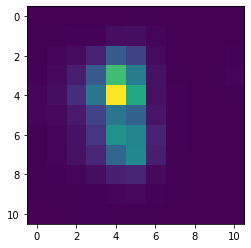

In [14]:
plt.imshow(sc.flux[sq][start:end].value[5])

In [17]:
data.psf_lightcurve(data_arr = sc.flux[sq][start:end], err_arr = sc.flux_err[sq][start:end], 
                        bkg_arr=sc.flux_bkg[sq,0,0][start:end], model_name="Gaussian", verbose=True, nstars=3, xc=[4.9, 4.5, 4.7], yc=[3.0, 4.4, 7.0], ignore_pixels=1, likelihood="gaussian")

AttributeError: type object 'tqdm' has no attribute 'trange'

In [ ]:
plt.plot(data.psf_ll)

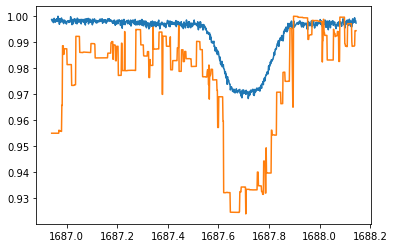

In [9]:
start_real = start+50
time = sc.time[sq][start_real:end]
photometry_flux = sc.to_lightcurve().flux[sq][start_real:end].value
plt.plot(time.value, photometry_flux / np.max(photometry_flux), label='aperture photometry')
psf_flux = data.all_psf[:,0]
plt.plot(time.value, psf_flux[start_real-start:end-start] / np.max(psf_flux[start_real-start:end-start]))

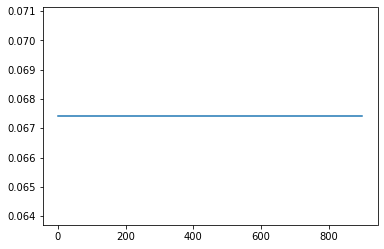

In [97]:
plt.plot(data.psf_params[:,-1])

In [98]:
print(lk.estimate_cdpp(photometry_flux, transit_duration=1))
print(lk.estimate_cdpp(psf_flux, transit_duration=1))

770.4013129712878 ppm
4023.540741255636 ppm
